In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('participant_id.csv')
results

,model,eeg_feature,remove_global_connections,remove_baseline_signal_noise_removal,number_test_targets,number_validation_targets,batch_size,hidden_channels,learning_rate,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params
0,GraphConv,wav,False,False,10,5,4,16,0.0100,2.995946,0.521875,0.521875,0.521875,0.521875,0.834360,9005
1,GraphConv,wav,False,False,10,5,4,16,0.0010,2.520777,0.996875,0.996875,0.996875,0.996875,1.000000,9005
2,GraphConv,wav,False,False,10,5,4,16,0.0001,2.616548,0.900000,0.900000,0.900000,0.900000,0.989657,9005
3,GraphConv,wav,False,False,10,5,4,32,0.0100,3.434893,0.081250,0.081250,0.081250,0.081250,0.607853,28205
4,GraphConv,wav,False,False,10,5,4,32,0.0010,2.521063,0.996875,0.996875,0.996875,0.996875,1.000000,28205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NOGNN,psd,False,False,34,5,4,32,0.0010,3.459525,0.047794,0.047794,0.047794,0.047794,0.507899,30800
164,NOGNN,psd,False,False,34,5,4,32,0.0001,3.411554,0.168199,0.168199,0.168199,0.168199,0.646041,30800
165,NOGNN,psd,False,False,34,5,4,128,0.0100,3.486790,0.031250,0.031250,0.031250,0.031250,0.490995,123056
166,NOGNN,psd,False,False,34,5,4,128,0.0010,3.455007,0.054228,0.054228,0.054228,0.054228,0.533966,123056


In [3]:
del results["remove_global_connections"]
del results["remove_baseline_signal_noise_removal"]

In [4]:
graphConvWav = results[(results["model"] == 'GraphConv') & (results["eeg_feature"] == 'wav')]
graphConvWav_acc = graphConvWav.test_acc.to_numpy()

graphConvPsd = results[(results["model"] == 'GraphConv') & (results["eeg_feature"] == 'psd')]
graphConvPsd_acc = graphConvPsd.test_acc.to_numpy()

<BarContainer object of 36 artists>

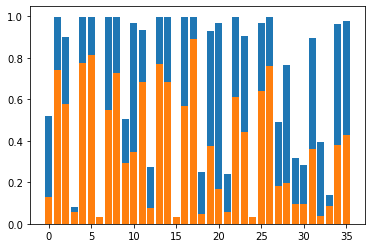

In [5]:
plt.bar(np.arange(0,len(graphConvWav_acc)), graphConvWav_acc)
plt.bar(np.arange(0,len(graphConvPsd_acc)), graphConvPsd_acc)

In [6]:
GatedGNNWav = results[(results["model"] == 'GatedGNN') & (results["eeg_feature"] == 'wav')]
GatedGNNWav_acc = GatedGNNWav.test_acc.to_numpy()

GatedGNNPsd = results[(results["model"] == 'GatedGNN') & (results["eeg_feature"] == 'psd')]
GatedGNNPsd_acc = GatedGNNPsd.test_acc.to_numpy()

<BarContainer object of 12 artists>

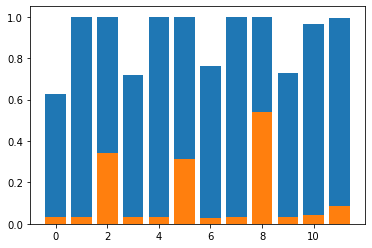

In [7]:
plt.bar(np.arange(0,len(GatedGNNWav_acc)), GatedGNNWav_acc)
plt.bar(np.arange(0,len(GatedGNNPsd_acc)), GatedGNNPsd_acc)

In [8]:
NOGNNWav = results[(results["model"] == 'NOGNN') & (results["eeg_feature"] == 'wav')]
NOGNNWav_acc = NOGNNWav.test_acc.to_numpy()

NOGNNPsd = results[(results["model"] == 'NOGNN') & (results["eeg_feature"] == 'psd')]
NOGNNPsd_acc = NOGNNPsd.test_acc.to_numpy()

<BarContainer object of 36 artists>

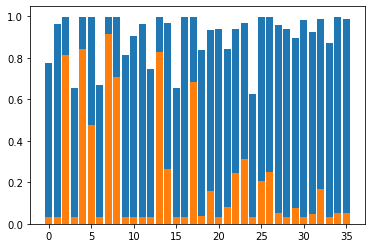

In [9]:
plt.bar(np.arange(0,len(NOGNNWav_acc)), NOGNNWav_acc)
plt.bar(np.arange(0,len(NOGNNPsd_acc)), NOGNNPsd_acc)